# Covid-19 US Timeseries Data

Source: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import datetime

from lib import get_or_update_source_data

In [2]:
get_or_update_source_data()

Updating source data


In [3]:
df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv') 

In [4]:
us_states_by_county = df[(df["Country/Region"]=='US') & (df["Province/State"].str.contains(','))]
us_states_by_county

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
33,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,14,21,31,51,58,71,83,83,116,NaN
34,"Cook County, IL",US,41.7377,-87.6976,0,0,1,1,1,1,...,4,4,4,5,5,6,7,7,11,NaN
40,"Los Angeles, CA",US,34.0522,-118.2437,0,0,0,0,1,1,...,1,1,7,11,13,14,14,14,20,NaN
56,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,NaN
59,"San Diego County, CA",US,32.7157,-117.1611,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,"Dane, WI",US,43.0186,-89.5498,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
343,"Pierce, WI",US,44.7509,-92.3814,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
344,"Cuyahoga, OH",US,41.4339,-81.6758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,NaN
345,"Weber, UT",US,41.2603,-111.9522,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


### On 3/10/20, data stopped being reported by county and began reporting at the state level:

Source: https://github.com/CSSEGISandData/COVID-19/issues/382

In [5]:
us_states = df[(df["Country/Region"]=='US') & (df["Province/State"].str.contains(',').apply(lambda x: not x))]
us_states

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
243,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,267,366.0
244,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,173,220.0
245,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,144,177.0
247,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,92,95.0
249,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,46,46.0
252,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,0,0,0,0,0,21,21,21,21,21.0
253,Georgia,US,33.0406,-83.6431,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,23.0
254,Colorado,US,39.0598,-105.3111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,34.0
255,Florida,US,27.7663,-81.6868,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,28.0
256,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,23.0


In [6]:
states_sum_by_county = us_states_by_county.sum().to_frame().drop(["Province/State", "Country/Region", "Lat", "Long"])
states_sum_by_county = states_sum_by_county[(states_sum_by_county[0]!=0)]
states_sum_by_county.columns = ["Confirmed Cases"]
states_sum_by_county.index = [datetime.datetime.strptime(index, "%m/%d/%y") for index in states_sum_by_county.index]
states_sum_by_county.loc[:'2020-03-9']

,Confirmed Cases
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
2020-01-27,5
2020-01-28,5
2020-01-29,5
2020-01-30,5
2020-01-31,7


In [7]:
states_sum = us_states.sum().to_frame().drop(["Province/State", "Country/Region", "Lat", "Long"])
states_sum = states_sum[(states_sum[0]!=0)]
states_sum.columns = ["Confirmed Cases"]
states_sum.index = [datetime.datetime.strptime(index, "%m/%d/%y") for index in states_sum.index]
states_sum.loc['2020-03-10':]

,Confirmed Cases
2020-03-10,959
2020-03-11,1281


In [8]:
totals = pd.concat([states_sum_by_county.loc[:'2020-03-9'], states_sum.loc['2020-03-10':]], axis=0)

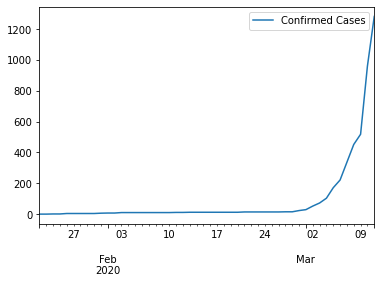

In [9]:
totals.plot()

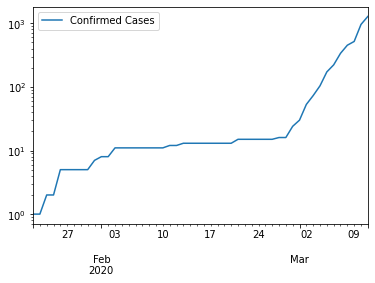

In [10]:
totals.plot(logy=True)